In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
import merge_data as md
import transform_data as td
import matplotlib.pyplot as plt
import seaborn as sns



# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)

import get_files_from_xdrive as gxdrive


In [2]:
data_set = gxdrive.read_file_from_xdrive_as_df('Prepared_Dataset_left_joint.csv')


In [3]:
data_set

,DateTime,Delivery_Start_Date_Forward_Price,Forward_Price_SE/CW(MWh),Average_Settlement_Price_SE/CW(MWh),Standard_Deviation_Settlement_Price_SE(MWh),Min_Settlement_Price_SE(MWh),Max_Settlement_Price_SE(MWh),Hydro_Inflow_N(MWavg),Hydro_Inflow_NE(MWavg),Hydro_Inflow_S(MWavg),...,Solar_capacity_SE/CW(MWavg),Total_capacity_NE(MWavg),Total_capacity_N(MWavg),Total_capacity_SE/CW(MWavg),Total_capacity_S(MWavg),Consumption(MWh)_N,Consumption(MWh)_NE,Consumption(MWh)_S,Consumption(MWh)_SE/CW,Daily_Sum_Consumption(MWh)
0,2021-04-30,2021-05-01,218.37,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
1,2021-04-30,2021-06-01,322.73,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
2,2021-04-30,2021-07-01,409.43,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
3,2021-04-30,2021-08-01,411.49,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
4,2021-04-30,2021-09-01,411.49,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69540,2024-10-07,2045-08-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69541,2024-10-07,2045-09-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69542,2024-10-07,2045-10-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69543,2024-10-07,2045-11-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6


In [4]:
# Check the shape of the dataset
print("Dataset Shape:", data_set.shape)

Dataset Shape: (69545, 44)


In [5]:
# 1. Summary of Missing Values by Column
missing_values = data_set.isnull().sum()
missing_percentage = (missing_values / len(data_set)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print("Missing Data Summary (Columns):")
print(missing_summary)

Missing Data Summary (Columns):
                                             Missing Count  Missing Percentage
DateTime                                                 0            0.000000
Delivery_Start_Date_Forward_Price                        0            0.000000
Forward_Price_SE/CW(MWh)                                 0            0.000000
Average_Settlement_Price_SE/CW(MWh)                     48            0.069020
Standard_Deviation_Settlement_Price_SE(MWh)             48            0.069020
Min_Settlement_Price_SE(MWh)                            48            0.069020
Max_Settlement_Price_SE(MWh)                            48            0.069020
Hydro_Inflow_N(MWavg)                                  256            0.368107
Hydro_Inflow_NE(MWavg)                                 256            0.368107
Hydro_Inflow_S(MWavg)                                  256            0.368107
Hydro_Inflow_SE/CW(MWavg)                              256            0.368107
Daily_Sum_Hydro_Infl

Missing Dates and Counts:
DateTime
2024-10-07    256
Name: count, dtype: int64


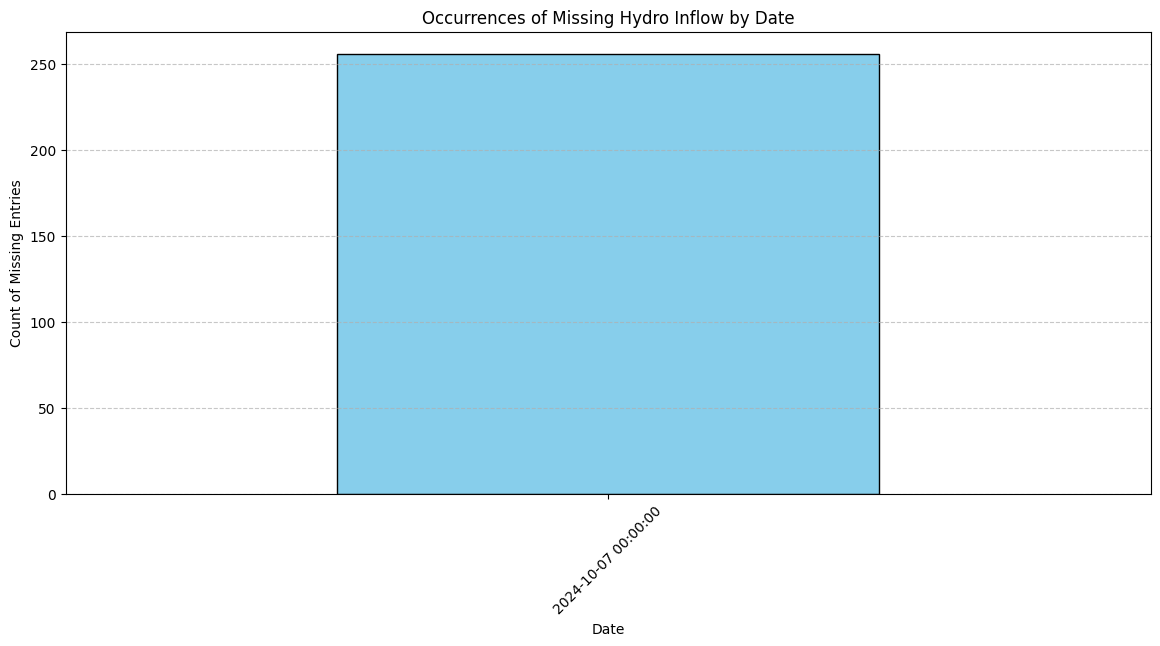

In [9]:
# Group missing dates and count occurrences
missing_date_counts = missing_hydro_dates.value_counts().sort_index()

# Print the unique missing dates and their counts
print("Missing Dates and Counts:")
print(missing_date_counts)

# Plot missing dates over time
plt.figure(figsize=(14, 6))
missing_date_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Occurrences of Missing Hydro Inflow by Date")
plt.xlabel("Date")
plt.ylabel("Count of Missing Entries")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

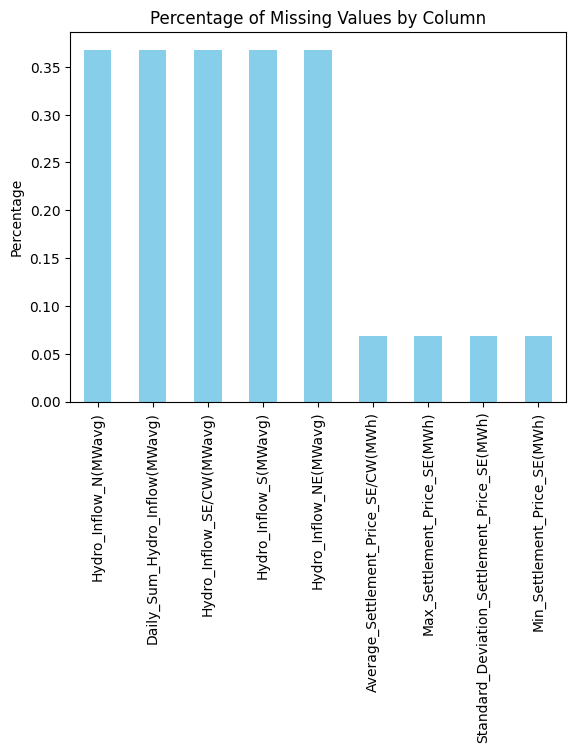

In [7]:
# Plot Missing Data by Column
plt.figure(figsize=(10, 6))
missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False).plot(
    kind='bar', y='Missing Percentage', legend=False, title='Percentage of Missing Values by Column', color='skyblue'
)
plt.ylabel('Percentage')
plt.show()

In [8]:
# 3. Rows with Missing Data
rows_with_missing = data_set[data_set.isnull().any(axis=1)]
rows_with_missing

,DateTime,Delivery_Start_Date_Forward_Price,Forward_Price_SE/CW(MWh),Average_Settlement_Price_SE/CW(MWh),Standard_Deviation_Settlement_Price_SE(MWh),Min_Settlement_Price_SE(MWh),Max_Settlement_Price_SE(MWh),Hydro_Inflow_N(MWavg),Hydro_Inflow_NE(MWavg),Hydro_Inflow_S(MWavg),...,Solar_capacity_SE/CW(MWavg),Total_capacity_NE(MWavg),Total_capacity_N(MWavg),Total_capacity_SE/CW(MWavg),Total_capacity_S(MWavg),Consumption(MWh)_N,Consumption(MWh)_NE,Consumption(MWh)_S,Consumption(MWh)_SE/CW,Daily_Sum_Consumption(MWh)
16245,2023-01-19,2023-01-01,69.00,NaN,NaN,NaN,NaN,21242.317,13592.5326,9007.1346,...,2873.33800,43125.975233,27231.088,73800.90110,21109.634,156000.0,279216.0,308469.6,968474.4,1712160.0
16246,2023-01-19,2023-02-01,69.00,NaN,NaN,NaN,NaN,21242.317,13592.5326,9007.1346,...,2873.33800,43125.975233,27231.088,73800.90110,21109.634,156000.0,279216.0,308469.6,968474.4,1712160.0
16247,2023-01-19,2023-03-01,69.50,NaN,NaN,NaN,NaN,21242.317,13592.5326,9007.1346,...,2873.33800,43125.975233,27231.088,73800.90110,21109.634,156000.0,279216.0,308469.6,968474.4,1712160.0
16248,2023-01-19,2023-04-01,70.50,NaN,NaN,NaN,NaN,21242.317,13592.5326,9007.1346,...,2873.33800,43125.975233,27231.088,73800.90110,21109.634,156000.0,279216.0,308469.6,968474.4,1712160.0
16249,2023-01-19,2023-05-01,69.83,NaN,NaN,NaN,NaN,21242.317,13592.5326,9007.1346,...,2873.33800,43125.975233,27231.088,73800.90110,21109.634,156000.0,279216.0,308469.6,968474.4,1712160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69540,2024-10-07,2045-08-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69541,2024-10-07,2045-09-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69542,2024-10-07,2045-10-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69543,2024-10-07,2045-11-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
